<a href="https://colab.research.google.com/github/HongEnJung/EDA-Prediction/blob/main/hw3_rnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical

(500,)


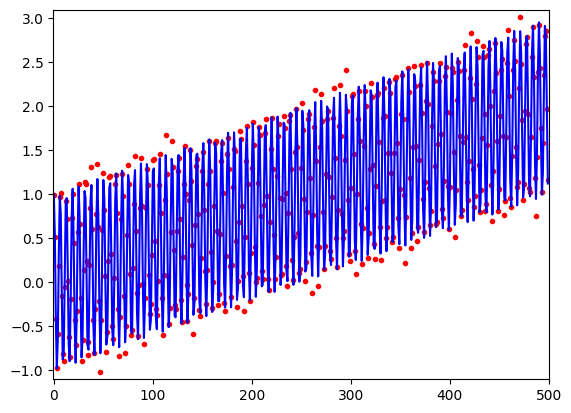

In [2]:
data_time = np.cos(np.arange(500))+np.random.normal(0,0.1,500)+np.arange(500)/250
print(data_time.shape)
plt.plot(data_time, 'r.')
plt.plot(range(500), np.cos(np.arange(500))+np.arange(500)/250, 'b')
plt.xlim(-0.5,500.5)
plt.ylim(-1.1,3.1)
plt.show()

## RNN
Keras 에서 RNN 을 사용하려면 입력 데이터는 (nb_samples, timesteps, input_dim) 크기를 가지는 ndim=3인 3차원 텐서(tensor) 형태이어야 합니다.
- nb_samples(= batch_size) : 자료의 수
- timesteps(= sequemce_length) : 순서열의 길이

- input_dim(= data_dim) : 입력 벡터의 차원

### Many to Many

In [3]:
batch_size=10
sequence_length = 4
data_dim = 3

In [4]:
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)
data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(497, 4)
[[ 0.99534012  0.52161242 -0.4141577  -0.97478464]
 [ 0.52161242 -0.4141577  -0.97478464 -0.58139181]
 [-0.4141577  -0.97478464 -0.58139181  0.18859984]
 ...
 [ 1.58282915  2.35510761  2.79692502  2.8619863 ]
 [ 2.35510761  2.79692502  2.8619863   1.97691726]
 [ 2.79692502  2.8619863   1.97691726  1.1589517 ]]


In [5]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:3]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,3]

print(datax.shape)
print(datay.shape)

(496, 3)
(496,)


In [6]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
datay = np.reshape(datay, (-1, sequence_length, 1))
print(datax.shape)
print(datay.shape)
print(datax[0])

(124, 4, 3)
(124, 4, 1)
[[ 0.99534012  0.52161242 -0.4141577 ]
 [ 0.52161242 -0.4141577  -0.97478464]
 [-0.4141577  -0.97478464 -0.58139181]
 [-0.97478464 -0.58139181  0.18859984]]


In [7]:
print(datax[0])
print(datay[0])

[[ 0.99534012  0.52161242 -0.4141577 ]
 [ 0.52161242 -0.4141577  -0.97478464]
 [-0.4141577  -0.97478464 -0.58139181]
 [-0.97478464 -0.58139181  0.18859984]]
[[-0.97478464]
 [-0.58139181]
 [ 0.18859984]
 [ 0.96811039]]


In [8]:
pd.DataFrame(data_matrix_np).corr()

,0,1,2,3
0,1.000000,0.712816,0.139740,-0.207770
1,0.712816,1.000000,0.713577,0.140155
2,0.139740,0.713577,1.000000,0.713387
3,-0.207770,0.140155,0.713387,1.000000


In [10]:
trnx = datax[0:90,:]
trny = datay[0:90]
tstx = datax[90:datax.shape[0],:]
tsty = datay[90:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(90, 4, 3)
(34, 4, 3)
(90, 4, 1)
(34, 4, 1)


In [11]:
# 입력 텐서
input_shape = (datax[0].shape)
input_tensor = layers.Input(input_shape)
print(input_shape)

(4, 3)


In [12]:
rnn_layer = layers.LSTM(10, return_sequences = True)(input_tensor)
output_tensor = layers.TimeDistributed(layers.Dense(1, activation = 'linear'))(rnn_layer)

In [13]:
# 모델 컴파일
model_mtom = models.Model(input_tensor, output_tensor)
model_mtom.compile(optimizer ='Adam', loss='mean_squared_error', metrics =['mean_squared_error'])

In [14]:
model_mtom.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model_mtom.fit(trnx, trny, validation_data= [tstx,tsty], epochs=300, batch_size =10, verbose=2)

Epoch 1/300
9/9 - 2s - loss: 1.2454 - mean_squared_error: 1.2454 - val_loss: 3.7101 - val_mean_squared_error: 3.7101 - 2s/epoch - 239ms/step
Epoch 2/300
9/9 - 0s - loss: 1.1446 - mean_squared_error: 1.1446 - val_loss: 3.3445 - val_mean_squared_error: 3.3445 - 48ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 1.0639 - mean_squared_error: 1.0639 - val_loss: 3.0148 - val_mean_squared_error: 3.0148 - 66ms/epoch - 7ms/step
Epoch 4/300
9/9 - 0s - loss: 0.9906 - mean_squared_error: 0.9906 - val_loss: 2.7211 - val_mean_squared_error: 2.7211 - 50ms/epoch - 6ms/step
Epoch 5/300
9/9 - 0s - loss: 0.9244 - mean_squared_error: 0.9244 - val_loss: 2.4542 - val_mean_squared_error: 2.4542 - 52ms/epoch - 6ms/step
Epoch 6/300
9/9 - 0s - loss: 0.8658 - mean_squared_error: 0.8658 - val_loss: 2.2143 - val_mean_squared_error: 2.2143 - 65ms/epoch - 7ms/step
Epoch 7/300
9/9 - 0s - loss: 0.8147 - mean_squared_error: 0.8147 - val_loss: 1.9978 - val_mean_squared_error: 1.9978 - 71ms/epoch - 8ms/step
Epoch 8/300
9

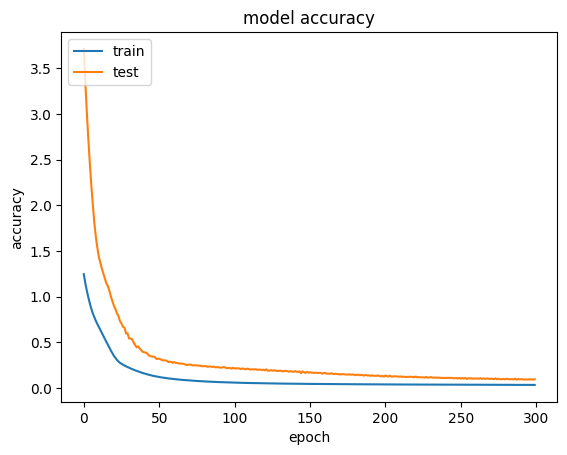

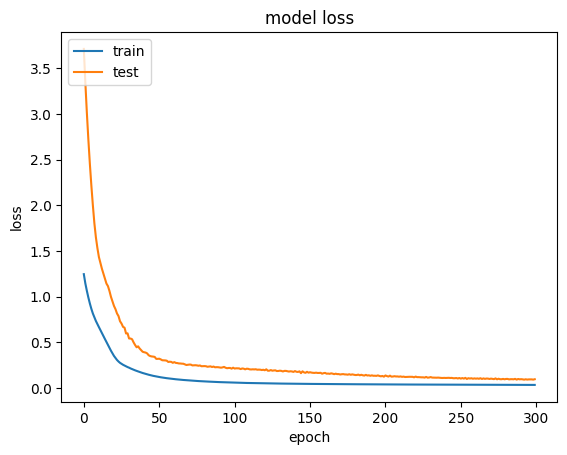

In [16]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
tmp = np.reshape(tsty, (-1,1))
print(tsty.shape)
print(tmp.shape)
print(max(tmp))

(34, 4, 1)
(136, 1)
[3.0120553]


2/2 [==============================] - 0s 7ms/step


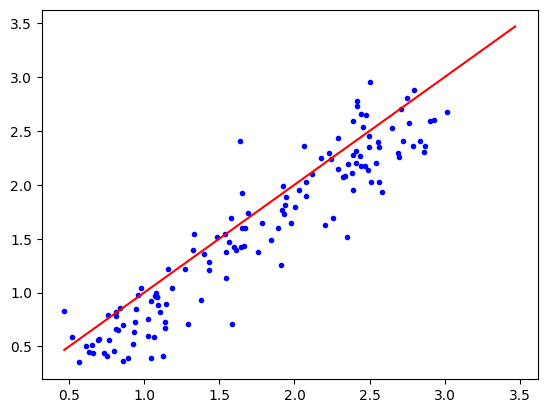

2/2 [==============================] - 0s 7ms/step


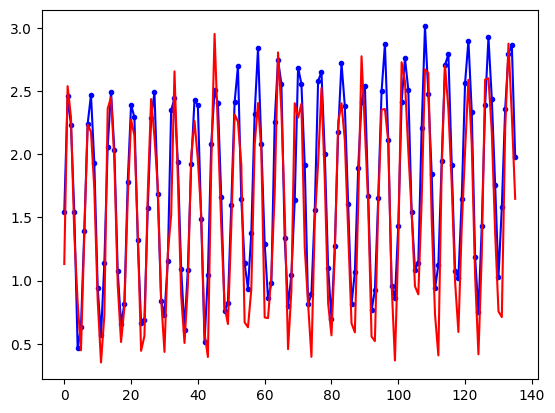

Minimum validation error is: 0.091004
Final validation error is: 0.095436


In [19]:
plt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)), 'b.')
plt.plot(np.arange(min(tmp), max(tmp)+0.5), np.arange(min(tmp), max(tmp)+0.5), 'r')
plt.show()

plt.plot(range(tmp.shape[0]), tmp, 'b.-')
plt.plot(range(tmp.shape[0]), np.reshape(model_mtom.predict(tstx), (-1,1)),'r-')
plt.show()

print('Minimum validation error is: %f' % np.min(history.history['val_mean_squared_error']))
print('Final validation error is: %f' % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1])

### Many to one

In [20]:
data_time.shape

(500,)

In [21]:
data_matrix = []
seq_len = 3
for i in range(0, len(data_time)- data_dim*sequence_length):
  tmp_data = data_time[i:i+data_dim*sequence_length+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(488, 13)
[[ 0.99534012  0.52161242 -0.4141577  ... -0.89479783 -0.04957663
   0.92113246]
 [ 0.52161242 -0.4141577  -0.97478464 ... -0.04957663  0.92113246
   0.71582536]
 [-0.4141577  -0.97478464 -0.58139181 ...  0.92113246  0.71582536
   0.01983412]
 ...
 [ 2.33465391  1.18811596  0.75348139 ...  2.35510761  2.79692502
   2.8619863 ]
 [ 1.18811596  0.75348139  1.42926596 ...  2.79692502  2.8619863
   1.97691726]
 [ 0.75348139  1.42926596  2.38802114 ...  2.8619863   1.97691726
   1.1589517 ]]


In [22]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,12]
print(datax.shape)
print(datay.shape)

(487, 12)
(487,)


In [23]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
print(datax.shape)
print(datay.shape)

(487, 4, 3)
(487,)


In [24]:
trnx = datax[0:350, :]
trny = datay[0:350]
tstx = datax[350:datax.shape[0],:]
tsty = datay[350:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(350, 4, 3)
(137, 4, 3)
(350,)
(137,)


In [25]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [26]:
rnn_layer = layers.LSTM(10)(input_tensor)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer)

In [27]:
# 모델 컴파일.
model_mtoo = models.Model(input_tensor, output_tensor)
model_mtoo.compile(optimizer = 'Adam',loss = 'mean_squared_error',metrics = ['mean_squared_error'])

In [28]:
model_mtoo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                560       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model_mtoo.fit(trnx, trny, validation_data = [tstx, tsty], epochs=300, batch_size=10,  verbose=2)

Epoch 1/300
35/35 - 2s - loss: 0.9252 - mean_squared_error: 0.9252 - val_loss: 1.7284 - val_mean_squared_error: 1.7284 - 2s/epoch - 56ms/step
Epoch 2/300
35/35 - 0s - loss: 0.6093 - mean_squared_error: 0.6093 - val_loss: 0.9038 - val_mean_squared_error: 0.9038 - 124ms/epoch - 4ms/step
Epoch 3/300
35/35 - 0s - loss: 0.4966 - mean_squared_error: 0.4966 - val_loss: 0.6937 - val_mean_squared_error: 0.6937 - 127ms/epoch - 4ms/step
Epoch 4/300
35/35 - 0s - loss: 0.4364 - mean_squared_error: 0.4364 - val_loss: 0.5918 - val_mean_squared_error: 0.5918 - 166ms/epoch - 5ms/step
Epoch 5/300
35/35 - 0s - loss: 0.3635 - mean_squared_error: 0.3635 - val_loss: 0.4805 - val_mean_squared_error: 0.4805 - 126ms/epoch - 4ms/step
Epoch 6/300
35/35 - 0s - loss: 0.2672 - mean_squared_error: 0.2672 - val_loss: 0.3730 - val_mean_squared_error: 0.3730 - 104ms/epoch - 3ms/step
Epoch 7/300
35/35 - 0s - loss: 0.1681 - mean_squared_error: 0.1681 - val_loss: 0.2852 - val_mean_squared_error: 0.2852 - 128ms/epoch - 4ms

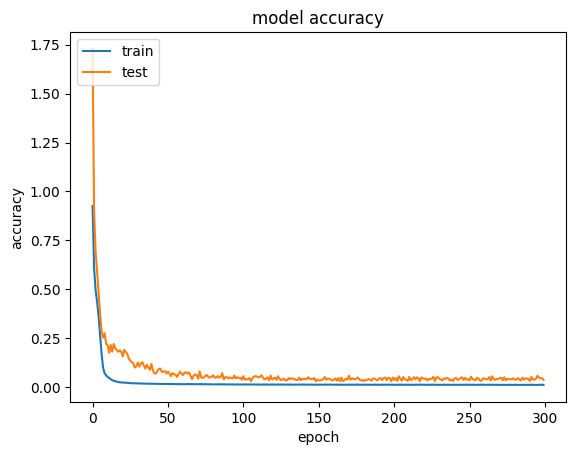

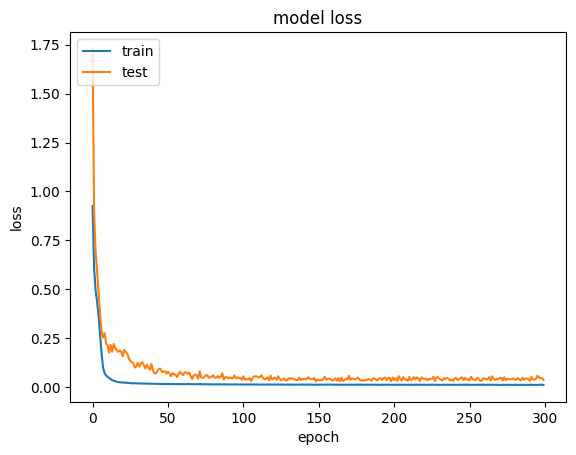

In [30]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 2ms/step


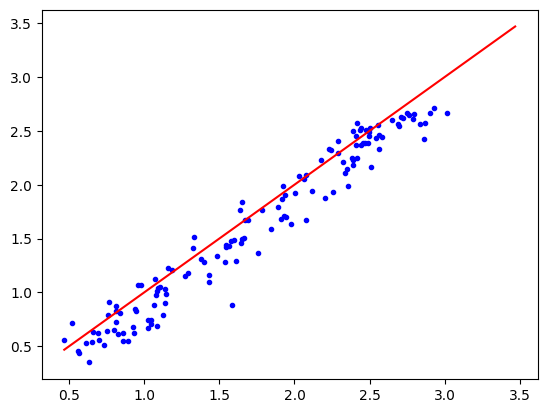

5/5 [==============================] - 0s 3ms/step


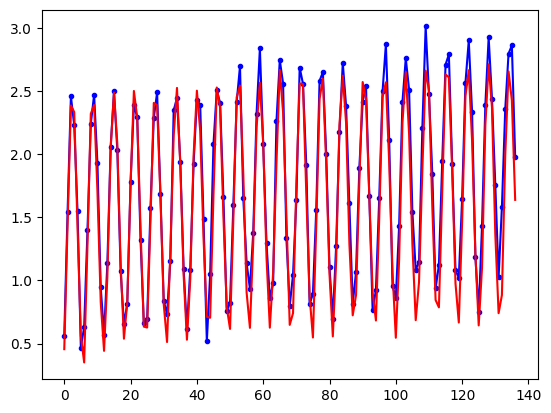

Minimum validation error is: 0.029801
Final validation error is: 0.037469


In [31]:
plt.plot(tsty, model_mtoo.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty),max(tsty)+1),np.arange(min(tsty),max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx), 'r-')
plt.show()
print("Minimum validation error is: %f" % np.min(history.history['val_mean_squared_error']))
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1])

## Bidirectional

In [32]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

rnn_layer = layers.Bidirectional(layers.LSTM(10), merge_mode = 'concat')(input_tensor)
output_tensor = layers.Dense(1, activation='linear')(rnn_layer)

In [33]:
# 모델 컴파일
model_bi = models.Model(input_tensor, output_tensor)
model_bi.compile(optimizer ='Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [34]:
model_bi.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 bidirectional (Bidirectiona  (None, 20)               1120      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model_bi.fit(trnx, trny, validation_data =[tstx, tsty], epochs = 300, batch_size=10, verbose = 2)

Epoch 1/300
35/35 - 4s - loss: 0.7423 - mean_squared_error: 0.7423 - val_loss: 0.8214 - val_mean_squared_error: 0.8214 - 4s/epoch - 113ms/step
Epoch 2/300
35/35 - 0s - loss: 0.5069 - mean_squared_error: 0.5069 - val_loss: 0.4530 - val_mean_squared_error: 0.4530 - 151ms/epoch - 4ms/step
Epoch 3/300
35/35 - 0s - loss: 0.4227 - mean_squared_error: 0.4227 - val_loss: 0.3934 - val_mean_squared_error: 0.3934 - 193ms/epoch - 6ms/step
Epoch 4/300
35/35 - 0s - loss: 0.3321 - mean_squared_error: 0.3321 - val_loss: 0.2993 - val_mean_squared_error: 0.2993 - 204ms/epoch - 6ms/step
Epoch 5/300
35/35 - 0s - loss: 0.2340 - mean_squared_error: 0.2340 - val_loss: 0.1975 - val_mean_squared_error: 0.1975 - 183ms/epoch - 5ms/step
Epoch 6/300
35/35 - 0s - loss: 0.1374 - mean_squared_error: 0.1374 - val_loss: 0.1402 - val_mean_squared_error: 0.1402 - 182ms/epoch - 5ms/step
Epoch 7/300
35/35 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.1248 - val_mean_squared_error: 0.1248 - 193ms/epoch - 6m

5/5 [==============================] - 0s 2ms/step


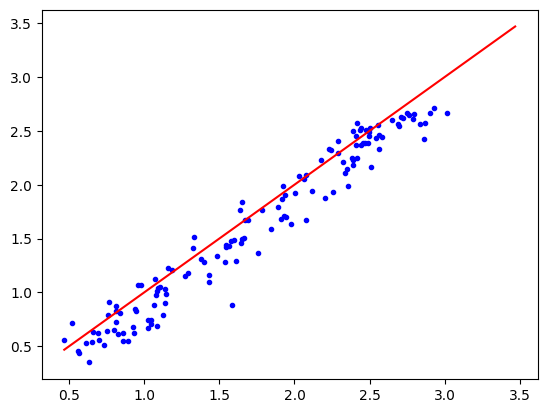

5/5 [==============================] - 0s 2ms/step


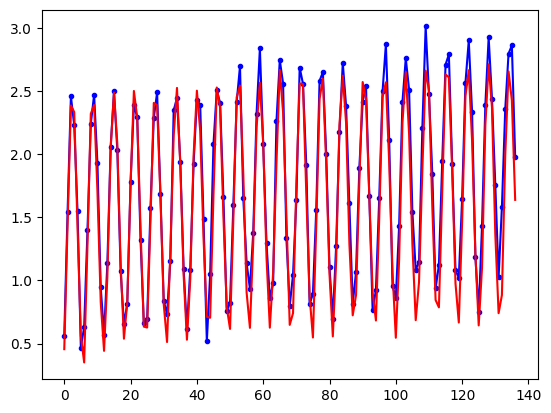

Minimum validation error is: 0.018569
Final validation error is: 0.042131


In [36]:
plt.plot(tsty, model_mtoo.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+1), np.arange(min(tsty), max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx), 'r-')
plt.show()
print("Minimum validation error is: %f" % np.min(history.history['val_mean_squared_error']))
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1])

## Anything you want
내마음대로


In [40]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

rnn_layer1 = layers.Bidirectional(layers.LSTM(50, return_sequences=True), merge_mode = 'concat')(input_tensor)
rnn_layer2 = layers.LSTM(30, return_sequences=True)(rnn_layer1)
rnn_layer3 = layers.LSTM(10, return_sequences=True)(rnn_layer2)
rnn_layer4 = layers.LSTM(10)(rnn_layer3)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer4)

In [41]:
# 모델 컴파일.
model_bi2 = models.Model(input_tensor, output_tensor)
model_bi2.compile(optimizer = 'Adam',loss = 'mean_squared_error',metrics = ['mean_squared_error'])

In [42]:
model_bi2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 4, 100)           21600     
 nal)                                                            
                                                                 
 lstm_16 (LSTM)              (None, 4, 30)             15720     
                                                                 
 lstm_17 (LSTM)              (None, 4, 10)             1640      
                                                                 
 lstm_18 (LSTM)              (None, 10)                840       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                           

In [43]:
history = model_bi2.fit(trnx, trny, validation_data = [tstx, tsty], epochs=300, batch_size=10,  verbose=2)

Epoch 1/300
35/35 - 10s - loss: 0.8714 - mean_squared_error: 0.8714 - val_loss: 0.7802 - val_mean_squared_error: 0.7802 - 10s/epoch - 273ms/step
Epoch 2/300
35/35 - 0s - loss: 0.4951 - mean_squared_error: 0.4951 - val_loss: 0.5798 - val_mean_squared_error: 0.5798 - 348ms/epoch - 10ms/step
Epoch 3/300
35/35 - 0s - loss: 0.1742 - mean_squared_error: 0.1742 - val_loss: 0.1362 - val_mean_squared_error: 0.1362 - 325ms/epoch - 9ms/step
Epoch 4/300
35/35 - 0s - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.1139 - val_mean_squared_error: 0.1139 - 333ms/epoch - 10ms/step
Epoch 5/300
35/35 - 0s - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0850 - val_mean_squared_error: 0.0850 - 320ms/epoch - 9ms/step
Epoch 6/300
35/35 - 0s - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1249 - val_mean_squared_error: 0.1249 - 344ms/epoch - 10ms/step
Epoch 7/300
35/35 - 0s - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0922 - val_mean_squared_error: 0.0922 - 338ms/epoch

5/5 [==============================] - 0s 3ms/step


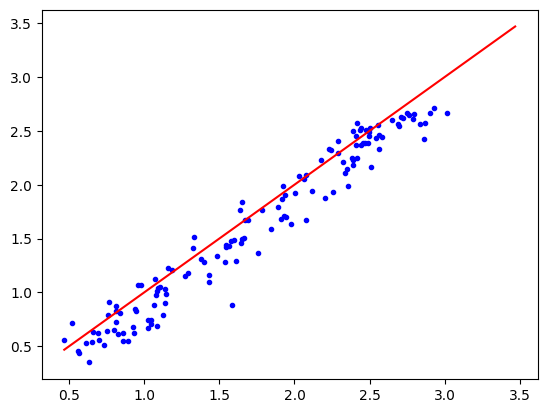

5/5 [==============================] - 0s 2ms/step


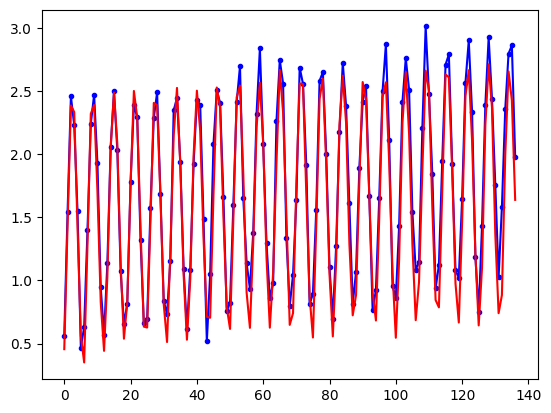

Minimum validation error is: 0.023175
Final validation error is: 0.047075


In [44]:
plt.plot(tsty, model_mtoo.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty),max(tsty)+1),np.arange(min(tsty),max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx), 'r-')
plt.show()
print("Minimum validation error is: %f" % np.min(history.history['val_mean_squared_error']))
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1])